In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [63]:
sample_submission = pd.read_csv('data/sample_submission.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [64]:
print(train.shape, test.shape)

(58645, 13) (39098, 12)


In [65]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [67]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [68]:
train.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [69]:
train.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

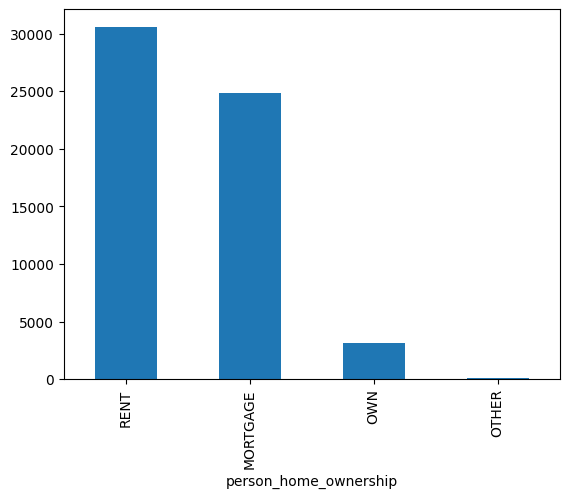

In [70]:
train['person_home_ownership'].value_counts().plot(kind='bar');

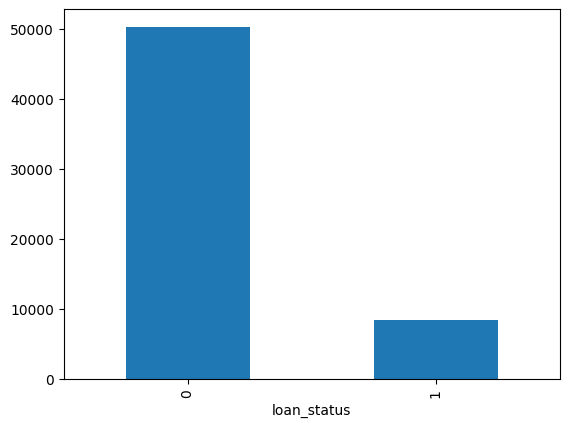

In [71]:
train['loan_status'].value_counts().plot(kind='bar');

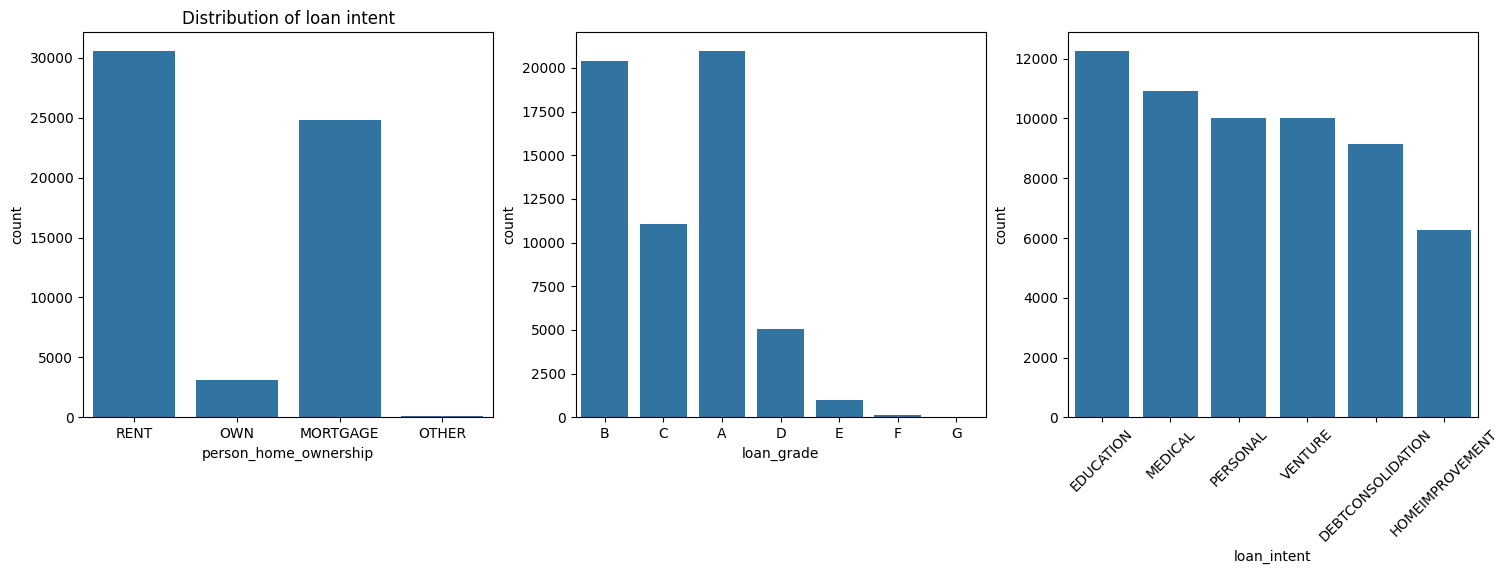

<Figure size 640x480 with 0 Axes>

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=train, x = 'person_home_ownership', ax = axes[0]);
axes[0].set_title('Distribution of home ownership')

sns.countplot(data=train, x = 'loan_grade', ax = axes[1]);
axes[0].set_title('Distribution of loan grade')

sns.countplot(data=train, x = 'loan_intent', ax = axes[2]);
axes[0].set_title('Distribution of loan intent')
plt.xticks(rotation=45)
plt.show();

plt.tight_layout();
plt.show();

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


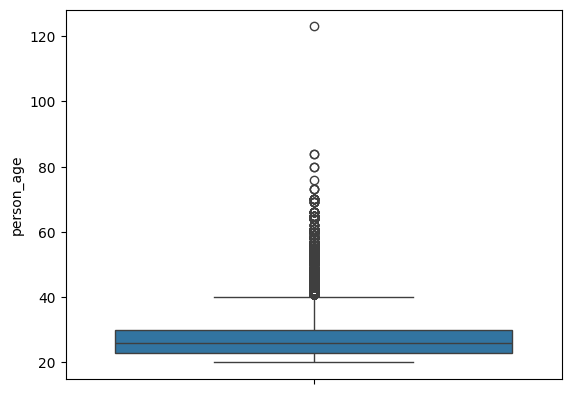

In [73]:
sns.boxplot(data=train['person_age']);

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


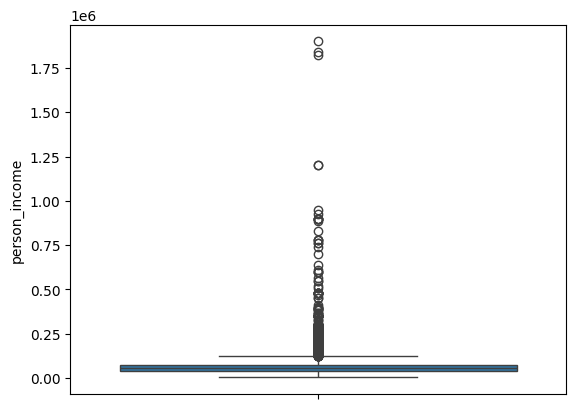

In [74]:
sns.boxplot(data=train['person_income']);

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


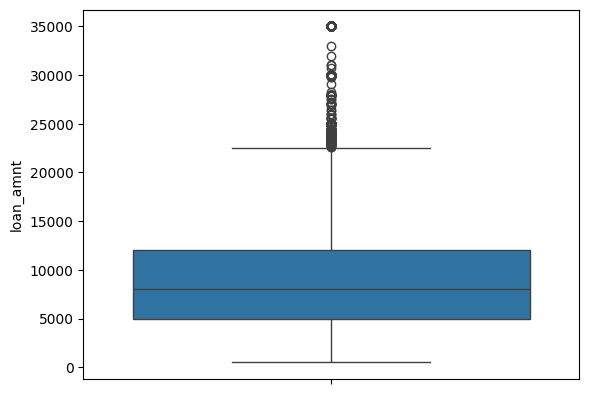

In [75]:
sns.boxplot(data=train['loan_amnt']);

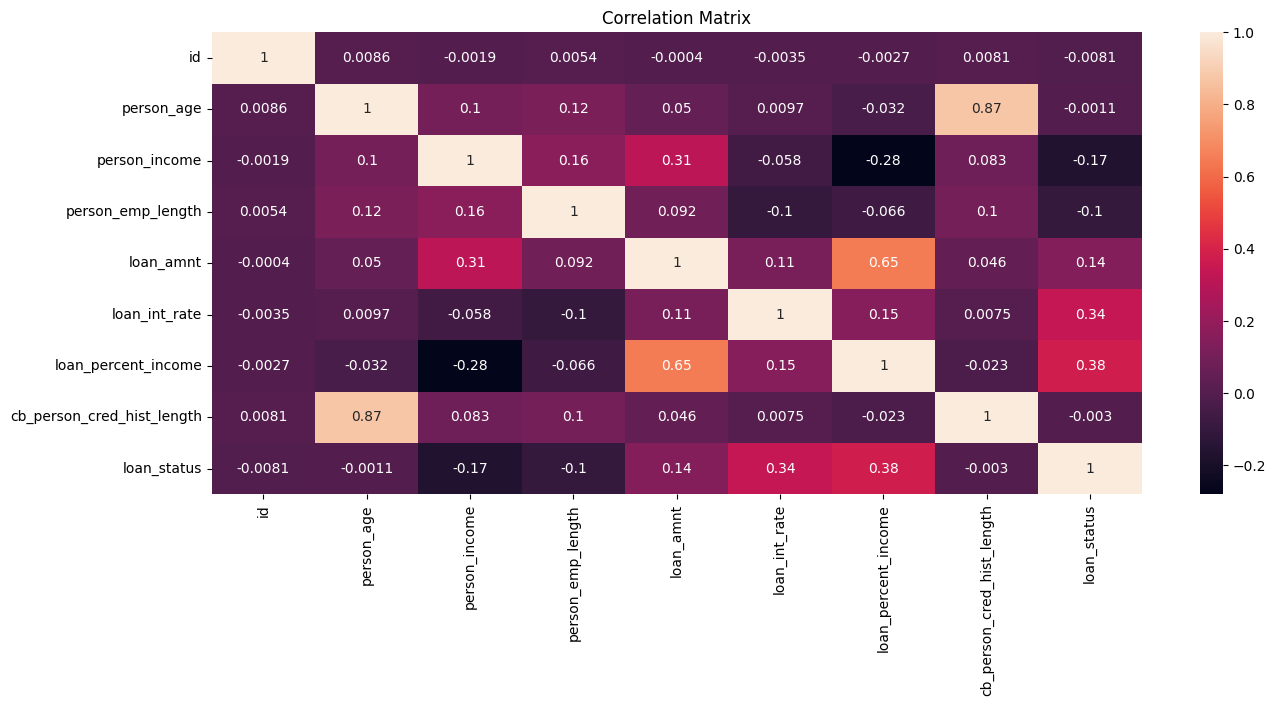

In [76]:
plt.figure(figsize=(15, 6))
sns.heatmap(train.corr(numeric_only=True), annot = True)
plt.title('Correlation Matrix')
plt.show()

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


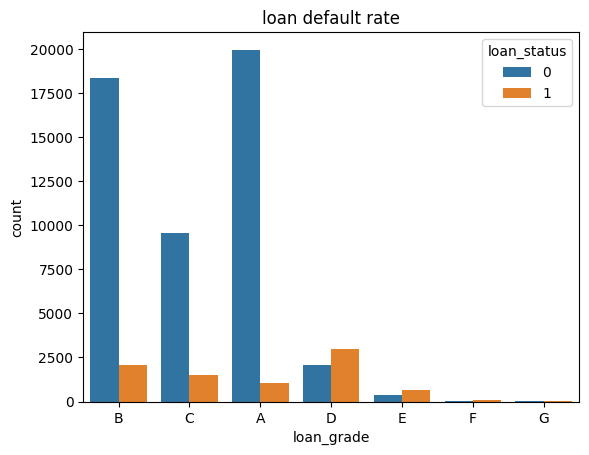

In [77]:
sns.countplot(data=train, x='loan_grade', hue = 'loan_status'); 
plt.title('loan default rate')
plt.show()

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


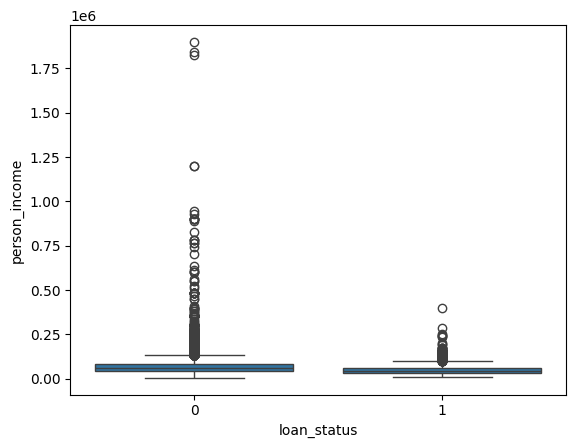

In [78]:
sns.boxplot(x=train['loan_status'], y = train['person_income']);

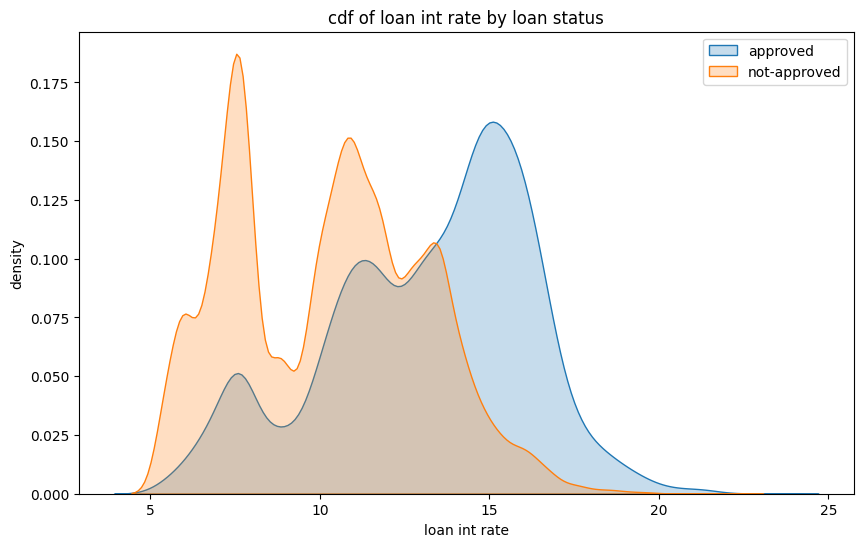

In [79]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train[train['loan_status'] == 1]['loan_int_rate'], label = 'approved', fill = True)
sns.kdeplot(train[train['loan_status'] == 0]['loan_int_rate'], label = 'not-approved', fill = True)
plt.title('cdf of loan int rate by loan status')
plt.xlabel('loan int rate')
plt.ylabel('density')
plt.legend()
plt.show()

In [80]:
train = train.drop(['id'], axis = 1)
test = test.drop(['id'], axis = 1)

X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify =y)

In [81]:
print("train ratio --> ",y_train.value_counts()[0]/y_train.value_counts()[1])
print("test ratio --> ", y_test.value_counts()[0]/y_test.value_counts()[1])

train ratio -->  6.023353293413174
test ratio -->  6.023353293413174


### Feature engineering

### Preprocessing

In [82]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ordinal_col = ['loan_grade']
onehot_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

ordinal_transformer = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G'][::-1]], dtype=int)
onehot_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_col),
        ('ohe', onehot_transformer, onehot_cols)
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('scaler', MinMaxScaler())
])

In [83]:
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.fit_transform(X_test)

test_processed = pipeline.transform(test)

### Modeling

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_preprocessed, y_train)

y_pred = clf.predict(X_test_preprocessed)
y_pred_proba = clf.predict_proba(X_test_preprocessed)[:, 1]

print(y_pred_proba)
print(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[0.24639354 0.12656041 0.33831195 ... 0.53171587 0.7389178  0.22364772]
[0 0 0 ... 1 1 0]
Accuracy: 0.8477278540370023
ROC AUC: 0.8878216129625628
Confusion Matrix:
 [[8672 1387]
 [ 399 1271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     10059
           1       0.48      0.76      0.59      1670

    accuracy                           0.85     11729
   macro avg       0.72      0.81      0.75     11729
weighted avg       0.89      0.85      0.86     11729



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tqdm import tqdm

models = {
    'logistic': LogisticRegression(max_iter=1000, random_state=42),
    'naivebayes': GaussianNB(),
    'dt': DecisionTreeClassifier(random_state=42),
    'rf': RandomForestClassifier(random_state=42, n_jobs=-1),
    'knn': KNeighborsClassifier(),
    'svm': SVC(probability=True, random_state=42),
    'bagging': BaggingClassifier(random_state=42, n_jobs=-1),
    'adaboost': AdaBoostClassifier(random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    results = {}
    for split, (X, y) in {"Train": (X_train, y_train), "Test": (X_test, y_test)}.items(): 
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X)

        results[split] = {
            "Accuracy": accuracy_score(y, y_pred), 
            "precision": precision_score(y, y_pred), 
            "recall": recall_score(y, y_pred), 
            "f1-score": f1_score(y, y_pred), 
            "ROC-AUC": roc_auc_score(y, y_proba), 
        }

    return results

final_result = {}
for name, model in tqdm(models.items()): 
    final_result[name] = evaluate_model(
        model = model, 
        X_train = X_train_preprocessed, 
        y_train = y_train, 
        X_test = X_test_preprocessed, 
        y_test = y_test
    )
result_df = pd.concat({outer: pd.DataFrame(inner).T for outer, inner in final_result.items()})
result_df

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [08:19<00:00, 62.38s/it] 


Accuracy  precision    recall  f1-score   ROC-AUC
logistic   Train  0.901100   0.752475  0.455090  0.567164  0.715118
           Test   0.847728   0.478179  0.761078  0.587338  0.811596
naivebayes Train  0.821234   0.428845  0.770060  0.550897  0.799895
           Test   0.729644   0.330702  0.877844  0.480419  0.791442
dt         Train  1.000000   1.000000  1.000000  1.000000  1.000000
           Test   0.771507   0.358385  0.765269  0.488159  0.768906
rf         Train  0.999936   1.000000  0.999551  0.999775  0.999775
           Test   0.848836   0.481535  0.804192  0.602377  0.830220
knn        Train  0.946585   0.909376  0.694012  0.787230  0.841265
           Test   0.867167   0.523007  0.762275  0.620370  0.823428
svm        Train  0.932177   0.894452  0.593713  0.713694  0.791041
           Test   0.872794   0.537301  0.767665  0.632150  0.828956
bagging    Train  0.992284   0.994831  0.950749  0.972290  0.974964
           Test   0.832296   0.448881  0.780838  0.570055  0.810839
adaboost   Train  0.927722   0.817043  0.634431  0.714250  0.805423
           Test   0.815756   0.424716  0.829341  0.561752  0.821421

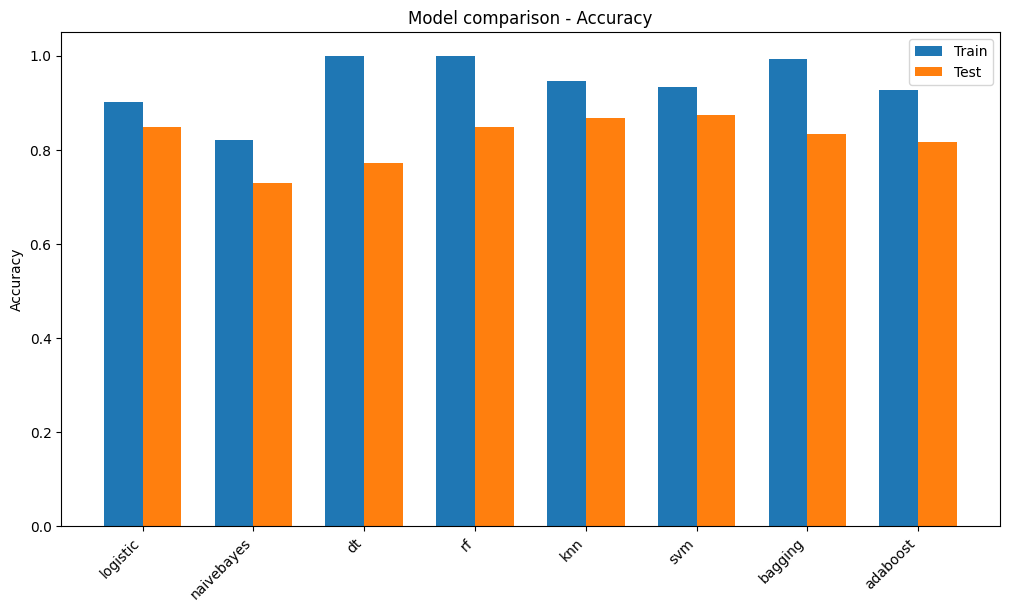

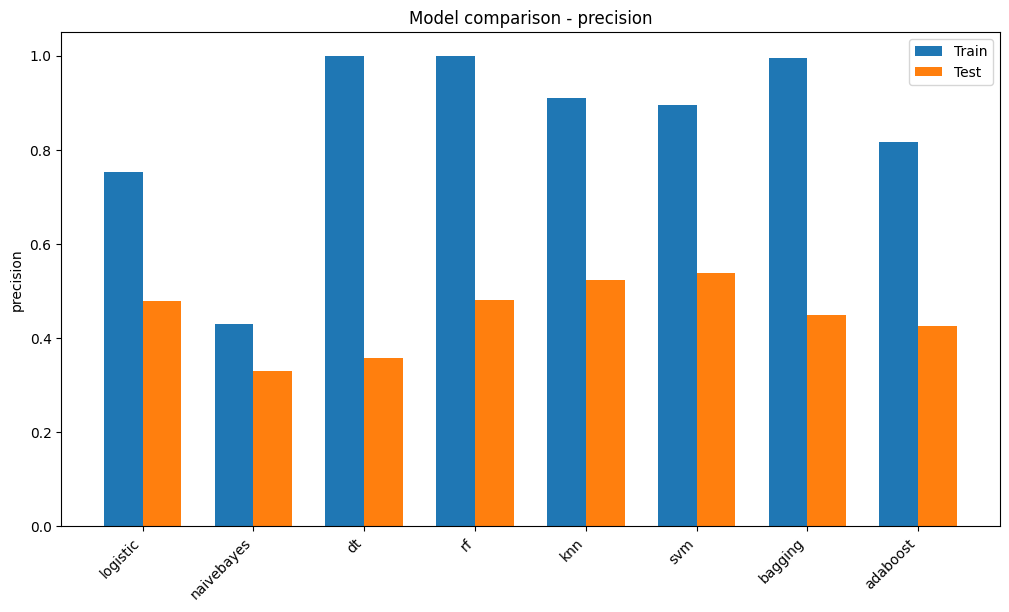

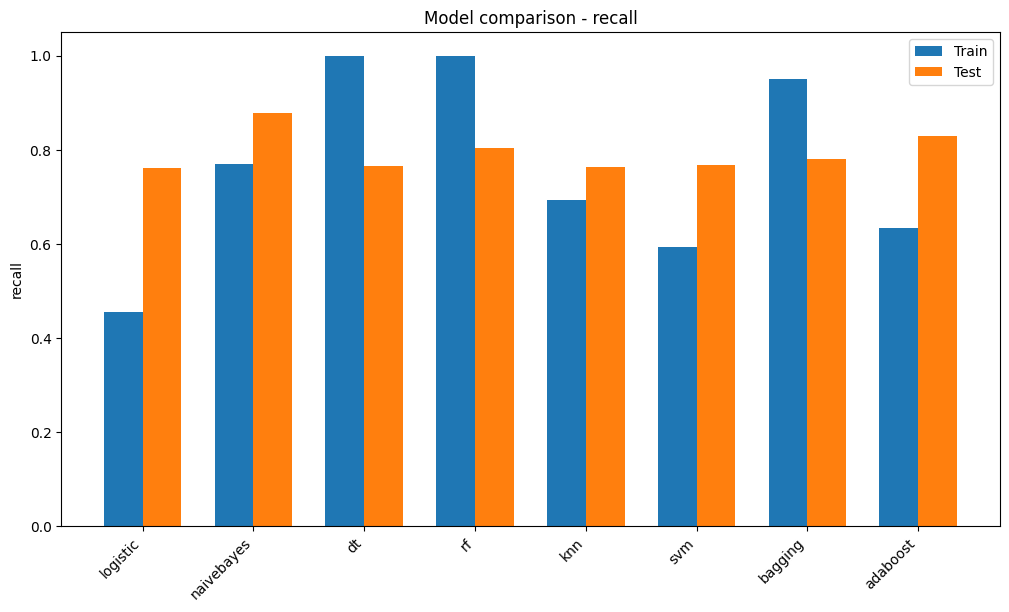

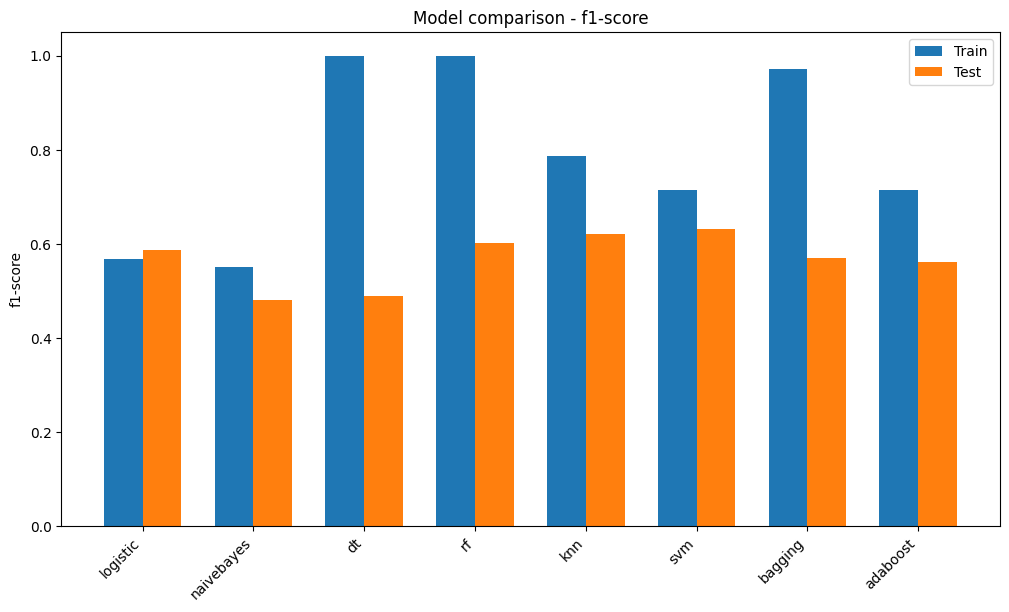

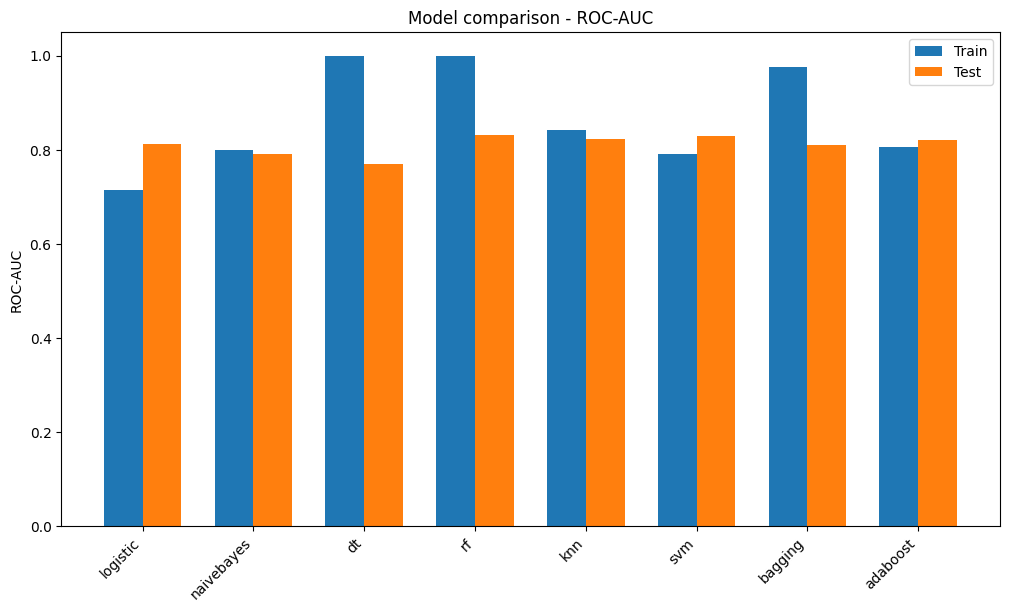

In [90]:
import numpy as np
metrics = ['Accuracy', 'precision', 'recall', 'f1-score', 'ROC-AUC']

for metric in metrics: 
    plt.figure(figsize=(10, 6))
    train_scores = [final_result[m]['Train'][metric] for m in models.keys()]
    test_scores = [final_result[m]['Test'][metric] for m in models.keys()]

    x = np.arange(len(models))
    width = 0.35

    plt.bar(x-width/2, train_scores, width, label = 'Train')  
    plt.bar(x+width/2, test_scores, width, label = 'Test') 

    plt.xticks(x, models.keys(), rotation = 45, ha='right')
    plt.tight_layout()
    plt.ylabel(metric)
    plt.title(f'Model comparison - {metric}')
    plt.legend()
    plt.show() 

### Hyperparam tuning 

In [93]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state = 42), rf_params, cv =5, scoring = 'f1', n_jobs=-1)
rf_grid.fit(X_train_preprocessed, y_train)

best_rf = rf_grid.best_estimator_

In [95]:
ada_params = {
    'n_estimators': [100, 200, 50],
    'learning_rate': [0.01, 0.1, 1.0], 
}

ada_grid = GridSearchCV(AdaBoostClassifier(random_state = 42), ada_params, cv =5, scoring = 'f1', n_jobs=-1)
ada_grid.fit(X_train_preprocessed, y_train)

best_ada = ada_grid.best_estimator_

In [104]:
import pprint
def eval_best_model(model, X_test, y_test): 
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred), 
        "precision": precision_score(y_test, y_pred, zero_division = 0), 
        "recall": recall_score(y_test, y_pred, zero_division = 0), 
        "f1-score": f1_score(y_test, y_pred, zero_division = 0), 
        "ROC-AUC": roc_auc_score(y_test, y_proba), 
    }

pprint.pprint(eval_best_model(best_rf, X_test_preprocessed, y_test))
pprint.pprint(eval_best_model(best_ada, X_test_preprocessed, y_test))

{'Accuracy': 0.8473868189956518,
 'ROC-AUC': 0.8764541004480749,
 'f1-score': 0.5999105945462674,
 'precision': 0.47860199714693297,
 'recall': 0.8035928143712575}
{'Accuracy': 0.8059510614715663,
 'ROC-AUC': 0.8750335297195648,
 'f1-score': 0.5469745222929936,
 'precision': 0.40966010733452596,
 'recall': 0.822754491017964}


In [108]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder = False,eval_metric='auc')

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 1.0], 
    'subsample': [0.7, 0.8, 1.0], 
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator = xgb_clf, 
    param_grid = param_grid, 
    scoring = 'accuracy', cv = 3
)

grid_search.fit(X_train_preprocessed, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_preprocessed)
print(accuracy_score(y_test, y_pred))

c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

0.8339159348623071


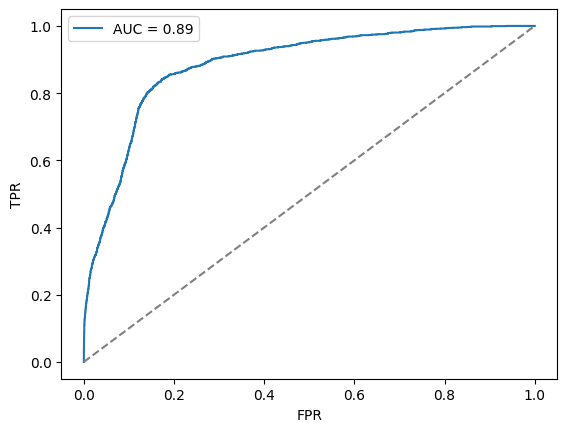

In [120]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
y_proba = best_model.predict_proba(X_test_preprocessed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color = 'gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

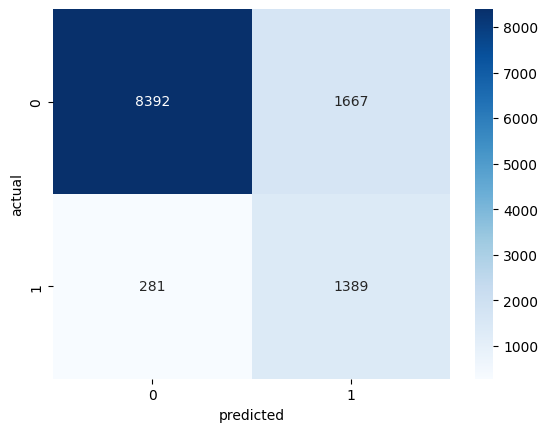

In [119]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap = 'Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     10059
           1       0.45      0.83      0.59      1670

    accuracy                           0.83     11729
   macro avg       0.71      0.83      0.74     11729
weighted avg       0.89      0.83      0.85     11729



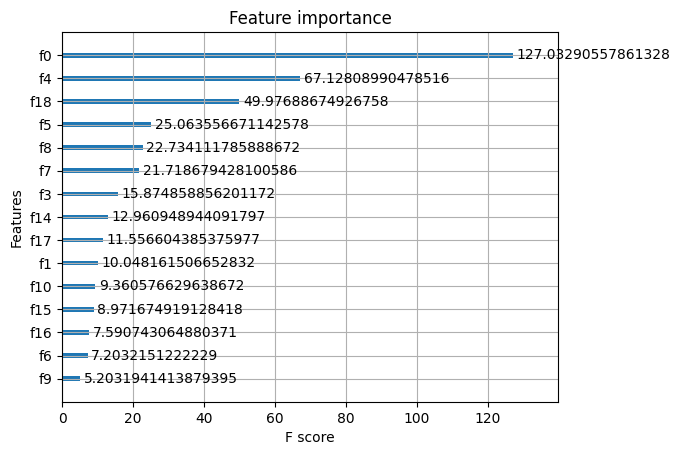

In [123]:
from xgboost import plot_importance

plot_importance(best_model, importance_type = 'gain', max_num_features = 15)
plt.show()

In [126]:
final_proba = best_model.predict_proba(test_processed)[:, 1]
submission = sample_submission.copy()
submission['loan_status'] = final_proba
submission.to_csv('data/submission.csv', index = False)

display(submission.head(10))

,id,loan_status
0,58645,0.994988
1,58646,0.212696
2,58647,0.996617
3,58648,0.109620
4,58649,0.322920
5,58650,0.994754
6,58651,0.002243
7,58652,0.031701
8,58653,0.973612
9,58654,0.043554
